In [15]:
# This line is a convenience to import most packages you'll need. You may need to import others (e.g. random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math, csv
from IPython.display import Audio
from sklearn.datasets import load_iris
import librosa.display
%matplotlib inline

chord_data = librosa.load('c.wav', sr=None)
chord = chord_data[0]
print(len(chord))
sr = chord_data[1]
Audio(chord, rate=sr)


39932


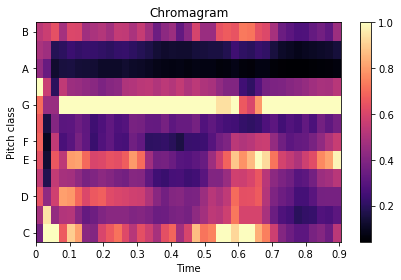

In [16]:
chromagram = librosa.feature.chroma_stft(chord, sr=sr, n_fft=2048, hop_length=1024)

librosa.display.specshow(chromagram,y_axis='chroma',x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()


1060.3864


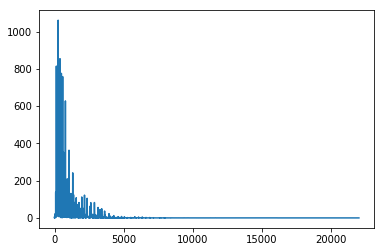

In [17]:
fft_chroma_test = np.fft.fft(chord)
fft_chroma_test = np.abs(fft_chroma_test)
Nf = np.shape(fft_chroma_test)[0]
fft_chroma_test = fft_chroma_test[0:int(Nf/2)+1] 

plt.figure(1)

freq_arr = np.arange(int(Nf/2)+1) * (sr/Nf)
plt.plot(freq_arr,fft_chroma_test)
#plt.xlim([0,2000])
print(np.max(fft_chroma_test))



1060.3864
[393.11899038 329.07151442 165.64002404 262.81550481]


"\nsroit = sr/16\nprint(str(np.shape(y)))\nspec = librosa.feature.chroma_stft(S=y)\nlibrosa.display.specshow(spec, y_axis='chroma',x_axis='time')\nplt.colorbar()\nplt.title('ChromaGRAM')\nplt.tight_layout()\nplt.show()\n"

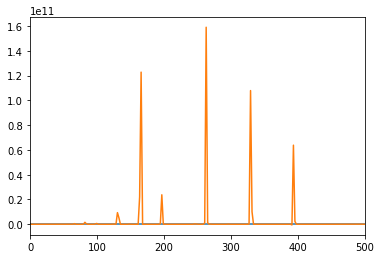

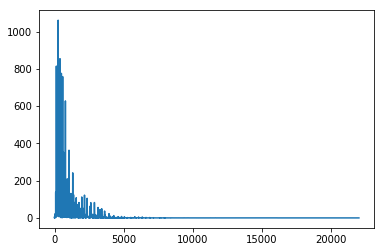

In [19]:
#chord = sp.signal.windows.hann(len(chord)) * chord

hps1 = sp.signal.decimate(fft_chroma_test, 1)
hps2 = sp.signal.decimate(fft_chroma_test, 2)
hps3 = sp.signal.decimate(fft_chroma_test, 4)
hps4 = sp.signal.decimate(fft_chroma_test, 8)
hps5 = sp.signal.decimate(fft_chroma_test, 16)

plt.figure(0)
win_len2 = len(hps1)
freq_arr2 = np.arange(win_len2) * ((sr/2)/win_len2)
plt.plot(freq_arr2, hps1)
#plt.xlim([0,2000])
'''
plt.figure(1)
hps2 = sp.signal.decimate(fft_chord, 8)
win_len2 = len(hps2)
freq_arr2 = np.arange(win_len2) * ((sr/8)/win_len2)
plt.plot(freq_arr2, hps2)
plt.xlim([0,2000])

'''
# Calculation for HPS 

y = np.zeros(len(hps5))
for i in range(len(hps5)):
    product = hps1[i] * hps2[i] * hps3[i] * hps4[i] * hps5[i]
    y[i] = product

# Plot for HPS

plt.figure(0)
win_len2 = len(y)
freq_arr2 = np.arange(win_len2) * ((sr/16)/win_len2)
plt.xlim([0,500])
plt.plot(freq_arr2, y)

fft_chroma_test = np.fft.fft(chord)
fft_chroma_test = np.abs(fft_chroma_test)
Nf = np.shape(fft_chroma_test)[0]
fft_chroma_test = fft_chroma_test[0:int(Nf/2)+1] 

plt.figure(1)

freq_arr = np.arange(int(Nf/2)+1) * (sr/Nf)
plt.plot(freq_arr,fft_chroma_test)
print(np.max(fft_chroma_test))
ind = np.argsort(y)
ind = ind*((sr/16)/win_len2)
leng = np.shape(ind)[0]
print(str(ind[leng-4:leng]))
'''
sroit = sr/16
print(str(np.shape(y)))
spec = librosa.feature.chroma_stft(S=y)
librosa.display.specshow(spec, y_axis='chroma',x_axis='time')
plt.colorbar()
plt.title('ChromaGRAM')
plt.tight_layout()
plt.show()
'''

400000
[  1536 163328 326144]
410.1148
[1046.32867133  528.67132867  330.41958042  385.48951049  396.5034965
  793.00699301  781.99300699]
376.0151
[352.44755245 704.8951049  286.36363636 693.88111888 297.37762238
 594.75524476 583.74125874]
327.48242
[649.82517483 495.62937063 528.67132867 881.11888112 330.41958042
 517.65734266 660.83916084]


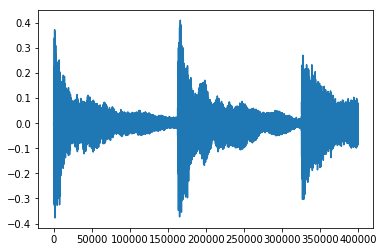

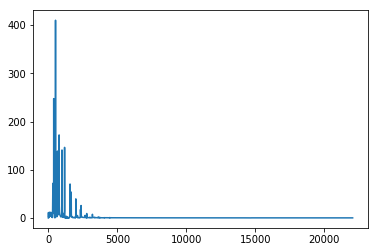

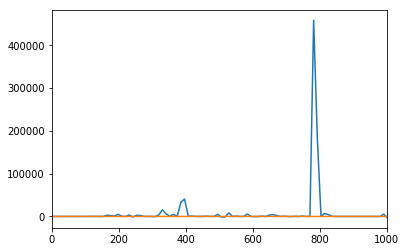

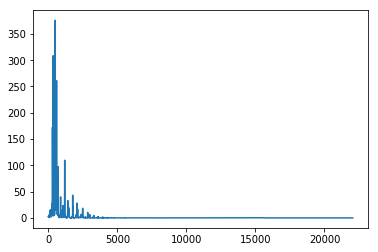

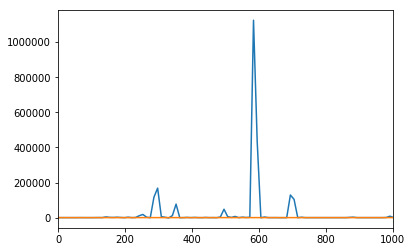

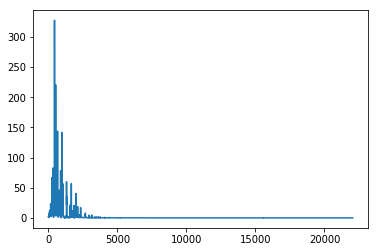

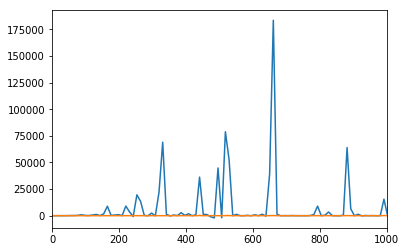

In [38]:
chord_data = librosa.load('chords.wav', sr=None)
chord = chord_data[0][0:400000]
print(len(chord))
sr = chord_data[1]
Audio(chord, rate=sr)

times = librosa.onset.onset_detect(y=chords, sr=sr, units='samples')
print(times)
plt.plot(chords)


for i in times:
    # Graph Chromogram of initial audio
    '''
    chromagram = librosa.feature.chroma_stft(chord[i:i+4000], sr=sr, n_fft=2048, hop_length=1024)
    librosa.display.specshow(chromagram,y_axis='chroma',x_axis='time')
    plt.figure(i+2)
    plt.colorbar()
    plt.title('Chromagram')
    plt.tight_layout()
    plt.show()
    '''
    
    #calc FFT
    fft_chroma_test = np.fft.fft(chord[i:i+8000])
    fft_chroma_test = np.abs(fft_chroma_test)
    Nf = np.shape(fft_chroma_test)[0]
    fft_chroma_test = fft_chroma_test[0:int(Nf/2)+1] 
    
    #plots FFT
    plt.figure(i)
    freq_arr = np.arange(int(Nf/2)+1) * (sr/Nf)
    plt.plot(freq_arr,fft_chroma_test)
    #plt.xlim([0,2000])
    #print(np.max(fft_chroma_test))
    
    # Decimates the FFT (downsamples)
    hps1 = sp.signal.decimate(fft_chroma_test, 1)
    hps2 = sp.signal.decimate(fft_chroma_test, 2)
    hps3 = sp.signal.decimate(fft_chroma_test, 4)
    #hps4 = sp.signal.decimate(fft_chroma_test, 8)
    #hps5 = sp.signal.decimate(fft_chroma_test, 16)
   #hps6 = sp.signal.decimate(fft_chroma_test, 32)
    
    #calculates HPS
    y = np.zeros(len(hps3))
    for j in range(len(hps3)):
        product = hps1[j] * hps2[j] * hps3[j] #* hps4[j] * hps5[j] * hps6[j]
        y[j] = product

    # Plot for HPS

    plt.figure(i+1)
    win_len2 = len(y)
    freq_arr2 = np.arange(win_len2) * ((sr/4)/win_len2)
    plt.xlim([0,1000])
    plt.plot(freq_arr2, y)
    
    '''
    # Plots original FFT for comparison
    fft_chroma_test = np.fft.fft(chord)
    fft_chroma_test = np.abs(fft_chroma_test)
    Nf = np.shape(fft_chroma_test)[0]
    fft_chroma_test = fft_chroma_test[0:int(Nf/2)+1] 
    plt.figure(1)
    '''
    #plots HPS and finds 4 largest peaks
    freq_arr = np.arange(int(Nf/2)+1) * (sr/Nf)
    plt.plot(freq_arr,fft_chroma_test)
    print(np.max(fft_chroma_test))
    ind = np.argsort(y)
    ind = ind*((sr/4)/win_len2)
    leng = np.shape(ind)[0]
    print(str(ind[leng-7:leng]))
